In [115]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from termcolor import colored

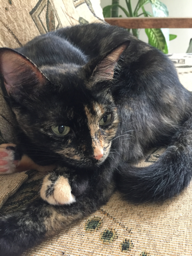

In [116]:
im = Image.open('dataset/wiki/IMG_1300.jpg')
im.to_thumb(256,256)

In [117]:
path=Path('dataset/')
fns = get_image_files(path)
failed = verify_images(fns)
print(colored(failed,'red'))

[]


In [118]:
cats=DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [119]:
data = cats.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


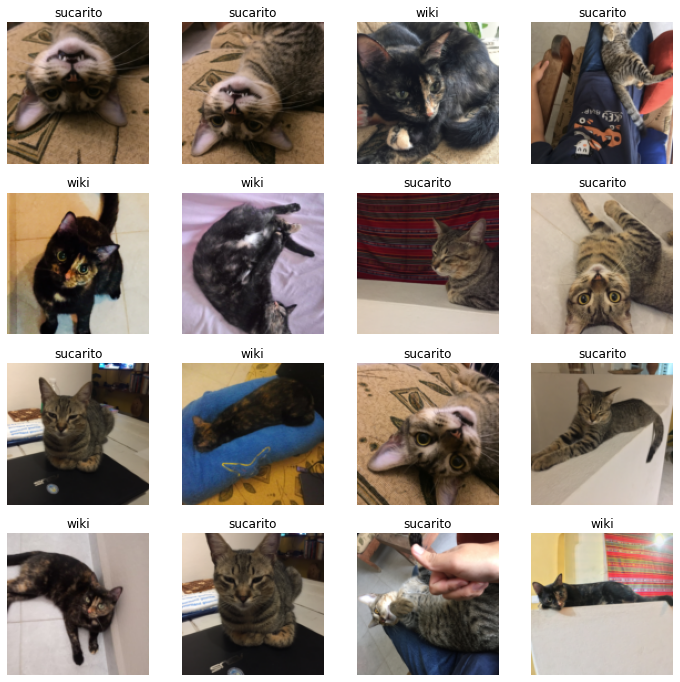

In [120]:
data.valid.show_batch(max_n=16, nrows=4)

In [122]:
learn = cnn_learner(data, resnet34, metrics=error_rate) 
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,0.894857,2.750214,0.454545,00:12


epoch,train_loss,valid_loss,error_rate,time
0,1.080212,1.905547,0.454545,00:13
1,1.036540,1.406016,0.409091,00:13
2,0.899710,0.960145,0.272727,00:13
3,0.800516,0.728198,0.181818,00:13
4,0.709507,0.568265,0.136364,00:13
5,0.618421,0.523662,0.136364,00:13
6,0.536263,0.467915,0.136364,00:13
7,0.483717,0.390794,0.090909,00:13
8,0.428565,0.312701,0.090909,00:13
9,0.389441,0.262558,0.045455,00:13


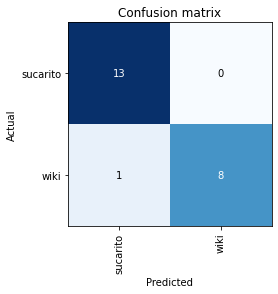

In [123]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

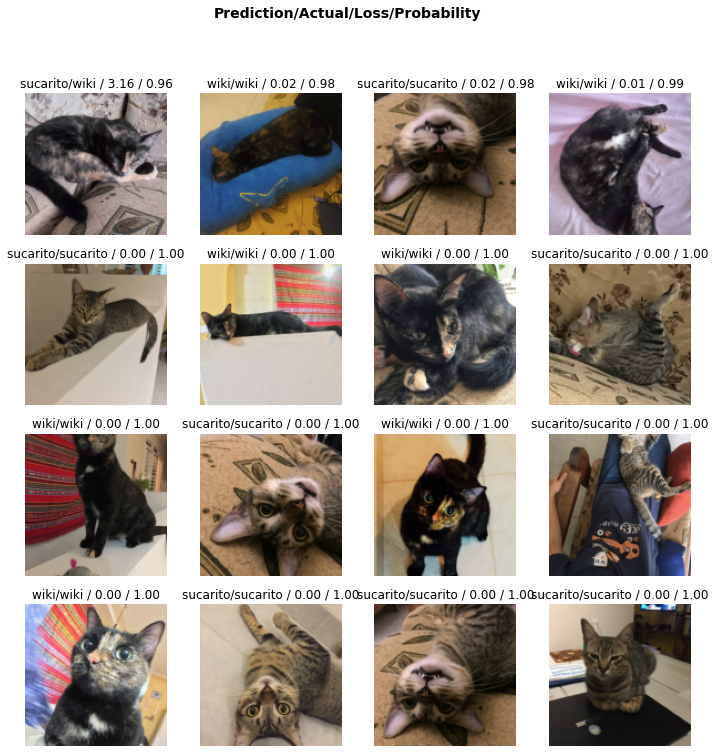

In [124]:
interp.plot_top_losses(16, nrows=4)

In [125]:
learn.export()

sucarito
tensor([0.9978, 0.0022])


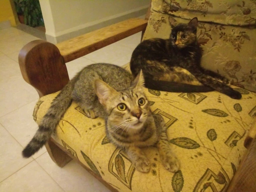

In [145]:
imgs=['0058','0133','0134','0301','0399','E0154','E0156','E0157','E0161','0001','0020','0003','0000','0005']

num=imgs[11]

path=f"test/IMG_{num}.jpg"
im = Image.open(path)
learn_inf = load_learner('export.pkl', cpu=True)
pred,pred_idx,probs = learn_inf.predict(path)
print(pred)
print(probs)
im.to_thumb(256,256)